## Mapping supplemental data from deck 704 to a CDM

This guide is a follow up from the [mdf_reader()](https://git.noc.ac.uk/brecinosrivas/mdf_reader/-/tree/master/) python tool [notebooks](https://git.noc.ac.uk/brecinosrivas/mdf_reader/-/tree/master/docs/notebooks). Where we extracted supplemental metadata from [ICOADSv3.0](https://icoads.noaa.gov/r3.html) stored in the [IMMA](https://icoads.noaa.gov/e-doc/imma/R3.0-imma1.pdf) format. 
Now we will map this supplemental data to a Common Data Model (CDM) format defined in the following [documentation](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/blob/master/docs/cdm_latest.pdf).

This is done by using the [cdm-mapper python tool from the branch deck704v0](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/tree/deck704v0) and following the workflow explained below. 

Along this notebook we will also point out Issues found in the cdm-mapper code and the cdm docs. This issues need to be address in the case that we want to map certain variables to the cdm.

We are analysing deck: `704`, the [US Marine Meteorological Journals Collection](https://icoads.noaa.gov/usmmj.html)

In [17]:
import os
import sys

MAIN_PATH = "/Users/brivas/c3s_work"
sys.path.append(MAIN_PATH)

import mdf_reader
import pandas as pd

import cdm

We first read the supplemental data information from the `c99` imma format for a subset of the data (e.g. 1878/10)

In [2]:
path_to_schema_folder = os.path.join(MAIN_PATH, "mdf_reader/data_models/lib/")
schema = "imma1_d704"

data_file_path = os.path.join(
    MAIN_PATH, "mdf_reader/tests/data/125-704_1878-10_subset.imma"
)

In [3]:
data_raw = mdf_reader.read(data_file_path, data_model=schema)

2021-01-26 15:59:15,751 - root - INFO - READING DATA MODEL SCHEMA FILE...
2021-01-26 15:59:15,754 - root - INFO - EXTRACTING DATA FROM MODEL: imma1_d704
2021-01-26 15:59:15,755 - root - INFO - Getting data string from source...
2021-01-26 15:59:15,768 - root - INFO - Extracting and reading sections
2021-01-26 15:59:15,770 - root - INFO - Processing section partitioning threads
2021-01-26 15:59:15,770 - root - INFO - 1000 ...
2021-01-26 15:59:15,784 - root - INFO - done
2021-01-26 15:59:15,784 - root - INFO - 211000 ...
2021-01-26 15:59:15,797 - root - INFO - done
2021-01-26 15:59:15,798 - root - INFO - 29211000 ...
2021-01-26 15:59:15,809 - root - INFO - done
2021-01-26 15:59:15,810 - root - INFO - 3029211000 ...
2021-01-26 15:59:15,812 - root - INFO - done
2021-01-26 15:59:15,813 - root - INFO - 303029211000 ...
2021-01-26 15:59:15,815 - root - INFO - done
2021-01-26 15:59:15,816 - root - INFO - 30303029211000 ...
2021-01-26 15:59:15,818 - root - INFO - done
2021-01-26 15:59:15,819 - 

Reading section core
Reading section c1
Reading section c5
Reading section c6
Reading section c7
Reading section c8
Reading section c9
Reading section c95
Reading section c96
Reading section c97
Reading section c98
Reading section c99_sentinal
Reading section c99_journal
Reading section c99_voyage
Reading section c99_daily
Reading section c99_data4


2021-01-26 15:59:17,314 - root - WARNING - Data numeric elements with missing upper or lower threshold: ('c1', 'BSI'),('c1', 'AQZ'),('c1', 'AQA'),('c1', 'UQZ'),('c1', 'UQA'),('c1', 'VQZ'),('c1', 'VQA'),('c1', 'PQZ'),('c1', 'PQA'),('c1', 'DQZ'),('c1', 'DQA'),('c5', 'OS'),('c5', 'OP'),('c5', 'FM'),('c5', 'IMMV'),('c5', 'IX'),('c5', 'W2'),('c5', 'WMI'),('c5', 'SD2'),('c5', 'SP2'),('c5', 'IS'),('c5', 'RS'),('c5', 'IC1'),('c5', 'IC2'),('c5', 'IC3'),('c5', 'IC4'),('c5', 'IC5'),('c5', 'IR'),('c5', 'RRR'),('c5', 'TR'),('c5', 'NU'),('c5', 'QCI'),('c5', 'QI1'),('c5', 'QI2'),('c5', 'QI3'),('c5', 'QI4'),('c5', 'QI5'),('c5', 'QI6'),('c5', 'QI7'),('c5', 'QI8'),('c5', 'QI9'),('c5', 'QI10'),('c5', 'QI11'),('c5', 'QI12'),('c5', 'QI13'),('c5', 'QI14'),('c5', 'QI15'),('c5', 'QI16'),('c5', 'QI17'),('c5', 'QI18'),('c5', 'QI19'),('c5', 'QI20'),('c5', 'QI21'),('c5', 'QI22'),('c5', 'QI23'),('c5', 'QI24'),('c5', 'QI25'),('c5', 'QI26'),('c5', 'QI27'),('c5', 'QI28'),('c5', 'QI29'),('c5', 'RHI'),('c5', 'AWSI'),('

Reading section c99_data5


2021-01-26 15:59:18,597 - root - INFO - Wrapping output....
2021-01-26 15:59:18,721 - root - INFO - CREATING OUTPUT DATA ATTRIBUTES FROM DATA MODEL


The data from the c99 column for this deck is separated in the following sub sections:
- c99_sentinal
- c99_journal
- c99_voyage
- c99_daily
- c99_data4
- c99_data5

In [4]:
data_raw.data.c99_sentinal.head()

,ATTI,ATTL,BLK
0,99,0,NaN
1,99,0,NaN
2,99,0,NaN
3,99,0,NaN
4,99,0,NaN


In [5]:
pd.options.display.max_columns = None
data_raw.data.c99_journal.head()

,sentinal,reel_no,journal_no,frame_no,ship_name,journal_ed,rig,ship_material,vessel_type,vessel_length,vessel_beam,commander,country,screw_paddle,hold_depth,tonnage,baro_type,baro_height,baro_cdate,baro_loc,baro_units,baro_cor,thermo_mount,SST_I
0,1,002,0018,0003,Panay,78,01,1,1,187,37,"S.P.Bray,Jr",01,3,23,1190,2,14,NaN,Bulkhead of cabin,1,- .102,2,NaN
1,1,002,0018,0003,Panay,78,01,1,1,187,37,"S.P.Bray,Jr",01,3,23,1190,2,14,NaN,Bulkhead of cabin,1,- .102,2,NaN
2,1,002,0018,0003,Panay,78,01,1,1,187,37,"S.P.Bray,Jr",01,3,23,1190,2,14,NaN,Bulkhead of cabin,1,- .102,2,NaN
3,1,002,0018,0003,Panay,78,01,1,1,187,37,"S.P.Bray,Jr",01,3,23,1190,2,14,NaN,Bulkhead of cabin,1,- .102,2,NaN
4,1,002,0018,0003,Panay,78,01,1,1,187,37,"S.P.Bray,Jr",01,3,23,1190,2,14,NaN,Bulkhead of cabin,1,- .102,2,NaN


In [6]:
data_raw.data.c99_voyage.head()

,sentinal,reel_no,journal_no,frame_start,from_city,to_city
0,2,002,0018,0014,Boston,Rio de Janeiro
1,2,002,0018,0014,Boston,Rio de Janeiro
2,2,002,0018,0014,Boston,Rio de Janeiro
3,2,002,0018,0014,Boston,Rio de Janeiro
4,2,002,0018,0014,Boston,Rio de Janeiro


In [7]:
data_raw.data.c99_daily.head()

,sentinal,reel_no,journal_no,frame_start,frame,year,month,day,distance,lat_deg_an,lat_min_an,lat_hemis_an,lon_deg_an,lon_min_an,lon_hemis_an,lat_deg_on,lat_min_on,lat_hemis_on,lon_deg_of,lon_min_of,lon_hemis_of,current_speed,current_direction
0,3,002,0018,0014,0015,1878,10,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,20,N,66,30,W,0.099976,E
1,3,002,0018,0014,0015,1878,10,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,20,N,66,30,W,0.099976,E
2,3,002,0018,0014,0015,1878,10,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,20,N,66,30,W,0.099976,E
3,3,002,0018,0014,0015,1878,10,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,20,N,66,30,W,0.099976,E
4,3,002,0018,0014,0015,1878,10,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,20,N,66,30,W,0.099976,E


In [8]:
data_raw.data.c99_data4.head()

,sentinal,reel_no,journal_no,frame_start,frame,year,month,day,time_ind,hour,ship_speed,compass_ind,ship_course_compass,compass_correction,ship_course_true,wind_dir_mag,wind_dir_true,wind_force,barometer,temp_ind,attached_thermometer,air_temperature,wet_bulb_temperature,sea_temperature,present_weather,clouds,sky_clear,sea_state
0,4,002,0018,0014,0015,1878,10,20,1,2,8.5,NaN,EXS,NaN,NaN,WSW,NaN,06,2960,1,5.800781,NaN,NaN,NaN,BOC,CU,5,R
1,4,002,0018,0014,0015,1878,10,20,1,4,8.5,NaN,EXS,NaN,NaN,WSW,NaN,06,2960,1,5.601562,NaN,NaN,NaN,BOC,SC,3,R
2,4,002,0018,0014,0015,1878,10,20,1,6,8.5,NaN,EXS,NaN,NaN,W,NaN,06,2962,1,5.601562,4.800781,NaN,5.199219,OCG,SC,0,R
3,4,002,0018,0014,0015,1878,10,20,1,8,8.0,NaN,EXS,NaN,NaN,W,NaN,06,2964,1,5.601562,4.800781,NaN,5.199219,CG,SC,0,R
4,4,002,0018,0014,0015,1878,10,20,1,10,8.5,NaN,EXS,NaN,NaN,W,NaN,06,2969,1,5.699219,4.800781,NaN,5.000000,BC,SC,2,L


In [9]:
data_raw.data.c99_data5.head()

,sentinal,reel_no,journal_no,frame_start,frame,year,month,day,time_ind,hour,ship_speed,compass_ind,ship_course_compass,blank,ship_course_true,wind_dir_mag,wind_dir_true,wind_force,barometer,temp_ind,attached_thermometer,air_temperature,wet_bulb_temperature,sea_temperature,present_weather,clouds,sky_clear,sea_state,compass_correction_ind,compass_correction,compass_correction_dir
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have separated the c99 data into the different sections, we see that this deck is composed of two types of data, which are the same:
    
    - c99_data4
    - c99_data5
    
Both sections have the same name in variables. To map the correct section into the CDM it is necessary to impose a filter on the sections composed only of NaN data. 
The problem is that we dont know which years in the time series will have a section c99_data4 and which will have a c99_data5

> Note that this solution of excluding one section, will only work for decks from which sections are exclusive: Among the sections listed in the block, only one of them appears in every report.


If we introduce this new filter option of NaN in the CDM mapper (more information in [Issue#1](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/issues/1)) we can map the correct section to a CDM constructed for deck 704. 

All the files to map this deck to the CDM are available [here](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/tree/deck704v0/lib/mappings/icoads_r3000_d704).

The CDM mapper follows this structure:

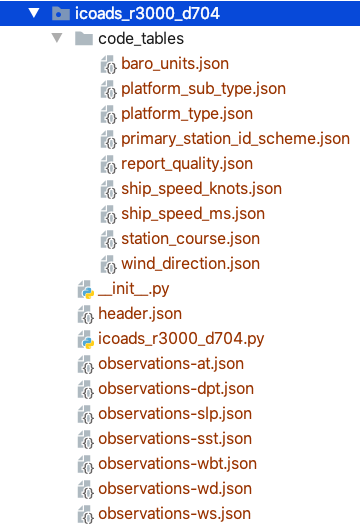

In [10]:
from IPython.display import Image

Image(filename="/Users/brivas/c3s_work/figures/cdm_704.png")

In the [icoads_r300_d704.py](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/blob/deck704v0/lib/mappings/icoads_r3000_d704/icoads_r3000_d704.py) file we will write all the functions needed to convert variables to the right units and/or specifications according with the [CDM documentation](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/blob/master/docs/cdm_latest.pdf)

To run the data model we need three things:

- raw data (the data we just read above)
- attributes of the raw data (sections and column names)
- the name of the model

> Note that the model and all necessary files should be already stored in the `cdm-mapper/lib/mappings` directory before you run anything!

In [11]:
attributes = data_raw.atts.copy()
name_of_model = "icoads_r3000_d704"

cdm_dict = cdm.map_model(
    name_of_model, data_raw.data, attributes, cdm_subset=None, log_level="INFO"
)

/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


Now, have we succeeded in writing some of the data to the CDM format?

We were looking to write the following data 

### Header section

 - Platform type and sub type
 - primary station id: original ship names
 - Longitude and Latitudes: converted from Degrees Minutes and Hemisphere to Decimal degrees
 - Location accuracy
 
 
### Observations tables

- `Observations-at`: latitude, longitude and location precision
- `Observations-dpt`: latitude, longitude and location precision
- `Observations-slp`: latitude, longitude and location precision
     - z_coordinate_type: Barometer height in feet converted to m.
     - original units: written in the CDM code format

- `Observations-sst`: latitude, longitude and location precision
- `Observations-wbt`: latitude, longitude and location precision
- `Observations-wd`: latitude, longitude and location precision
- `Observations-ws`: latitude, longitude and location precision


In [12]:
data = cdm_dict["header"]["data"]
data.head()

,report_id,application_area,observing_programme,report_type,station_type,platform_type,platform_sub_type,primary_station_id,station_record_number,primary_station_id_scheme,longitude,latitude,location_accuracy,location_quality,crs,station_speed,station_course,height_of_station_above_local_ground,height_of_station_above_sea_level,report_meaning_of_timestamp,report_timestamp,report_duration,report_time_accuracy,report_time_quality,report_quality,duplicate_status,record_timestamp,history,source_id,source_record_id
0,ICOADS-30-020N16,"[1, 7, 10, 11]","[5, 7, 56]",0,2,2,18,Panay,1,8.0,-66.5,42.33,NaN,3,0,4.11552,90.0,0.0,0.0,2,1878-10-20 06:00:00,11,3600.0,2,0,4,2021-01-26 15:59:19.580147,2021-01-26 15:59:19. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N16
1,ICOADS-30-020N1P,"[1, 7, 10, 11]","[5, 7, 56]",0,2,2,18,Panay,1,8.0,-66.5,42.33,NaN,3,0,4.11552,90.0,0.0,0.0,2,1878-10-20 08:00:00,11,3600.0,2,0,4,2021-01-26 15:59:19.580147,2021-01-26 15:59:19. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N1P
2,ICOADS-30-020N25,"[1, 7, 10, 11]","[5, 7, 56]",0,2,2,18,Panay,1,8.0,-66.5,42.33,NaN,3,0,4.11552,90.0,0.0,0.0,2,1878-10-20 10:00:00,11,3600.0,2,0,4,2021-01-26 15:59:19.580147,2021-01-26 15:59:19. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N25
3,ICOADS-30-020N2Q,"[1, 7, 10, 11]","[5, 7, 56]",0,2,2,18,Panay,1,8.0,-66.5,42.33,NaN,3,0,4.11552,90.0,0.0,0.0,2,1878-10-20 12:00:00,11,3600.0,2,0,4,2021-01-26 15:59:19.580147,2021-01-26 15:59:19. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N2Q
4,ICOADS-30-020N3A,"[1, 7, 10, 11]","[5, 7, 56]",0,2,2,18,Panay,1,8.0,-66.5,42.33,NaN,3,0,4.11552,90.0,0.0,0.0,2,1878-10-20 14:00:00,11,3600.0,2,0,4,2021-01-26 15:59:19.580147,2021-01-26 15:59:19. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N3A


We now show an example of Lat and Lon

In [13]:
data.latitude.head(), data.longitude.head()

(0    42.33
 1    42.33
 2    42.33
 3    42.33
 4    42.33
 Name: latitude, dtype: float64,
 0   -66.5
 1   -66.5
 2   -66.5
 3   -66.5
 4   -66.5
 Name: longitude, dtype: float64)

In [14]:
data_raw.data.c99_daily[
    [
        "lat_deg_on",
        "lat_min_on",
        "lat_hemis_on",
        "lon_deg_of",
        "lon_min_of",
        "lon_hemis_of",
    ]
].head()

,lat_deg_on,lat_min_on,lat_hemis_on,lon_deg_of,lon_min_of,lon_hemis_of
0,42,20,N,66,30,W
1,42,20,N,66,30,W
2,42,20,N,66,30,W
3,42,20,N,66,30,W
4,42,20,N,66,30,W


This has been succesfully converted to Decimal degrees with the right (-) for each hemisphere. 


Now for the SLP we have other information:

In [15]:
data_raw.data.c99_journal[["baro_type", "baro_height", "baro_units"]].head()

,baro_type,baro_height,baro_units
0,2,14,1
1,2,14,1
2,2,14,1
3,2,14,1
4,2,14,1


Baro type original code table

```
{
	"1":"aneroid",
	"2":"mercurial"
}
```
Baro units original code table. It has been left like this:

```
{
	"1":"inches",
	"2":"millimeters",
	"3":"millibars",
	"4":"unable to determine",
	"5":"Paris inches"
}
```

Our CDM table will be
```
{
  "1":1001,
  "2":1002,
  "3":1003,
  "4":9999,
  "5":1005
}
```

9999 will be the `"fill_value": 9999` that indicates to the CDM-mapper that these are NaN values.


In [16]:
data_obs = cdm_dict["observations-slp"]["data"]
data_obs.head()

,observation_id,report_id,data_policy_licence,date_time,date_time_meaning,observation_duration,longitude,latitude,crs,z_coordinate_type,observed_variable,observation_value,value_significance,units,conversion_flag,location_precision,spatial_representativeness,quality_flag,numerical_precision,sensor_automation_status,exposure_of_sensor,original_precision,original_units,original_value,conversion_method,processing_level,traceability,advanced_qc,advanced_uncertainty,advanced_homogenisation,source_id
0,ICOADS-30-020N16-SLP,ICOADS-30-020N16,0,1878-10-20 06:00:00,2,8,-66.5,42.33,0,4.267252,58,99610.0,2,32,0,NaN,3,2,NaN,5,3,NaN,1001,996.1,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
1,ICOADS-30-020N1P-SLP,ICOADS-30-020N1P,0,1878-10-20 08:00:00,2,8,-66.5,42.33,0,4.267252,58,99630.0,2,32,0,NaN,3,2,NaN,5,3,NaN,1001,996.3,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
2,ICOADS-30-020N25-SLP,ICOADS-30-020N25,0,1878-10-20 10:00:00,2,8,-66.5,42.33,0,4.267252,58,99690.0,2,32,0,NaN,3,2,NaN,5,3,NaN,1001,996.9,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
3,ICOADS-30-020N2Q-SLP,ICOADS-30-020N2Q,0,1878-10-20 12:00:00,2,8,-66.5,42.33,0,4.267252,58,99760.0,2,32,0,NaN,3,2,NaN,5,3,NaN,1001,997.6,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
4,ICOADS-30-020N3A-SLP,ICOADS-30-020N3A,0,1878-10-20 14:00:00,2,8,-66.5,42.33,0,4.267252,58,99920.0,2,32,0,NaN,3,2,NaN,5,3,NaN,1001,999.2,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
